In [1]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_selection import SelectKBest

# model serialization
import joblib

In [2]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/crypto_data_updated_13_november.csv',
                 parse_dates=True,
                 index_col='Date')

In [4]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [5]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [6]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-12-06 00:00:00+00:00,14291.500000,12656300032,428.588013,1998259968,1.00991,1281490048,2.58769,41731500
2017-12-07 00:00:00+00:00,17899.699219,17950699520,434.407990,2129570048,1.03166,1671609984,2.77995,28297900
2017-12-08 00:00:00+00:00,16569.400391,21135998976,456.031006,2336379904,1.01760,1993030016,2.83067,38648500
2017-12-09 00:00:00+00:00,15178.200195,13911300096,473.502014,2003849984,1.01713,1598909952,2.61043,27217000
2017-12-10 00:00:00+00:00,15455.400391,13433299968,441.721008,1404179968,1.01775,1649500032,2.48337,19258500


In [7]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2022-12-02 00:00:00+00:00,17088.660156,19539705127,1294.303345,6213645709,1.000065,26380777290,293.527496,854253818
2022-12-03 00:00:00+00:00,16908.236328,16217776704,1243.334839,5672609405,1.000061,20609261957,290.563141,634607105
2022-12-04 00:00:00+00:00,17130.486328,16824520830,1280.256592,5174128454,1.000120,21649754992,292.288300,633441009
2022-12-05 00:00:00+00:00,16974.826172,22209086834,1259.676758,6120359523,1.000054,28743587598,288.474274,705616866
2022-12-06 00:00:00+00:00,16985.564453,19166461952,1254.076782,4961430528,1.000067,25190412288,287.758911,563659648


In [8]:
data.shape

(1827, 8)

In [9]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-12-06 00:00:00+00:00 to 2022-12-05 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [11]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Close (BTC),1826.0,2.032597e+04,1.699014e+04,3.236762e+03,7.682069e+03,1.096059e+04,3.374026e+04,6.756683e+04
Volume (BTC),1826.0,2.656525e+10,1.983973e+10,2.923670e+09,1.267395e+10,2.431223e+10,3.580401e+10,3.509679e+11
Close (ETH),1826.0,1.139324e+03,1.201612e+03,8.430830e+01,2.089203e+02,5.063193e+02,1.803337e+03,4.812087e+03
Volume (ETH),1826.0,1.318466e+10,1.080551e+10,9.484880e+08,4.963904e+09,1.104831e+10,1.836379e+10,8.448291e+10
Close (USDT),1826.0,1.001572e+00,5.754334e-03,9.666440e-01,9.999753e-01,1.000484e+00,1.002481e+00,1.077880e+00
Volume (USDT),1826.0,4.200424e+10,3.818845e+10,1.090880e+09,8.112138e+09,3.716750e+10,6.100956e+10,2.790675e+11
Close (BNB),1826.0,1.473857e+02,1.841608e+02,2.483370e+00,1.440590e+01,2.612009e+01,2.964119e+02,6.756841e+02
Volume (BNB),1826.0,9.839923e+08,1.449831e+09,9.284000e+03,1.462349e+08,3.649697e+08,1.431708e+09,1.798295e+10


<AxesSubplot:xlabel='Date'>

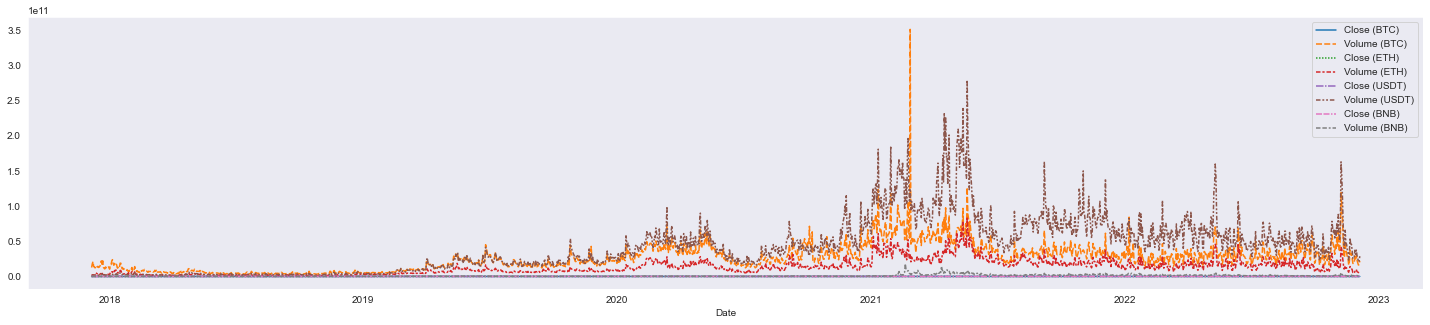

In [13]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

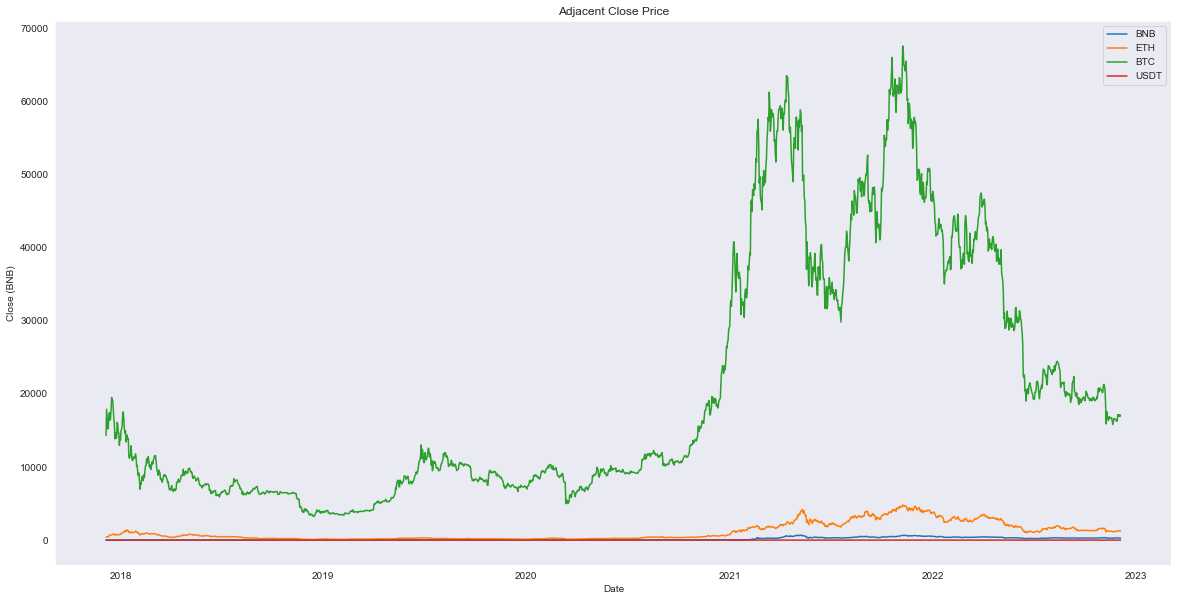

In [14]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

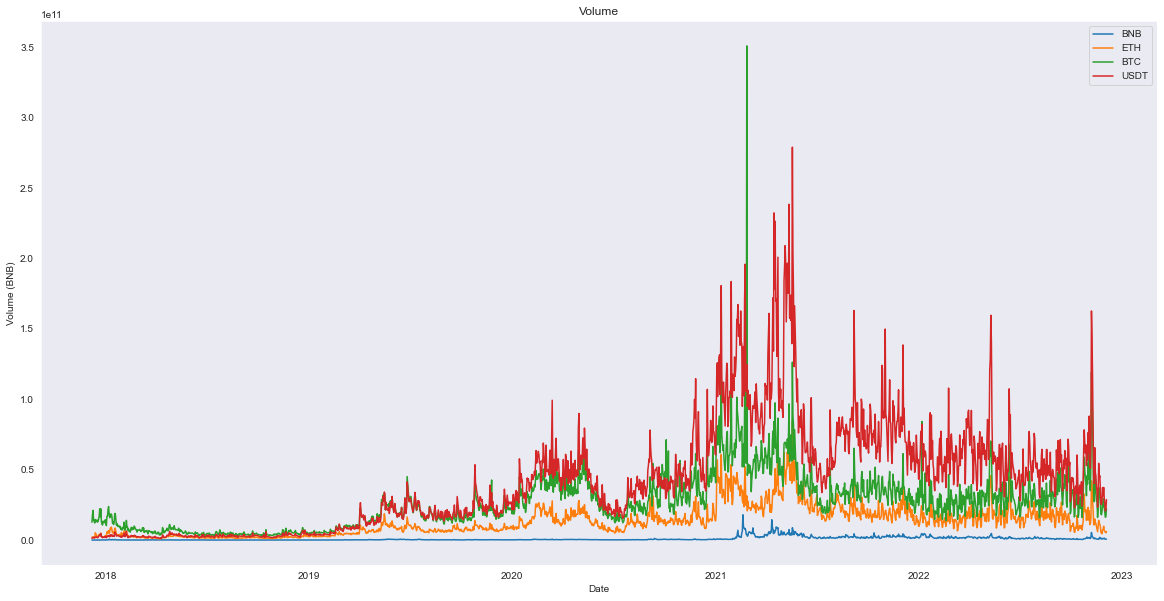

In [15]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [16]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.553167,0.923476,0.661434,-0.148031,0.762788,0.895250,0.762089
Volume (BTC),0.553167,1.000000,0.374925,0.854163,-0.099045,0.866135,0.403851,0.595567
Close (ETH),0.923476,0.374925,1.000000,0.538181,-0.152305,0.622351,0.952794,0.648011
Volume (ETH),0.661434,0.854163,0.538181,1.000000,-0.117770,0.945712,0.553969,0.695120
Close (USDT),-0.148031,-0.099045,-0.152305,-0.117770,1.000000,-0.140005,-0.165273,-0.116036
Volume (USDT),0.762788,0.866135,0.622351,0.945712,-0.140005,1.000000,0.645680,0.771713
Close (BNB),0.895250,0.403851,0.952794,0.553969,-0.165273,0.645680,1.000000,0.714229
Volume (BNB),0.762089,0.595567,0.648011,0.695120,-0.116036,0.771713,0.714229,1.000000


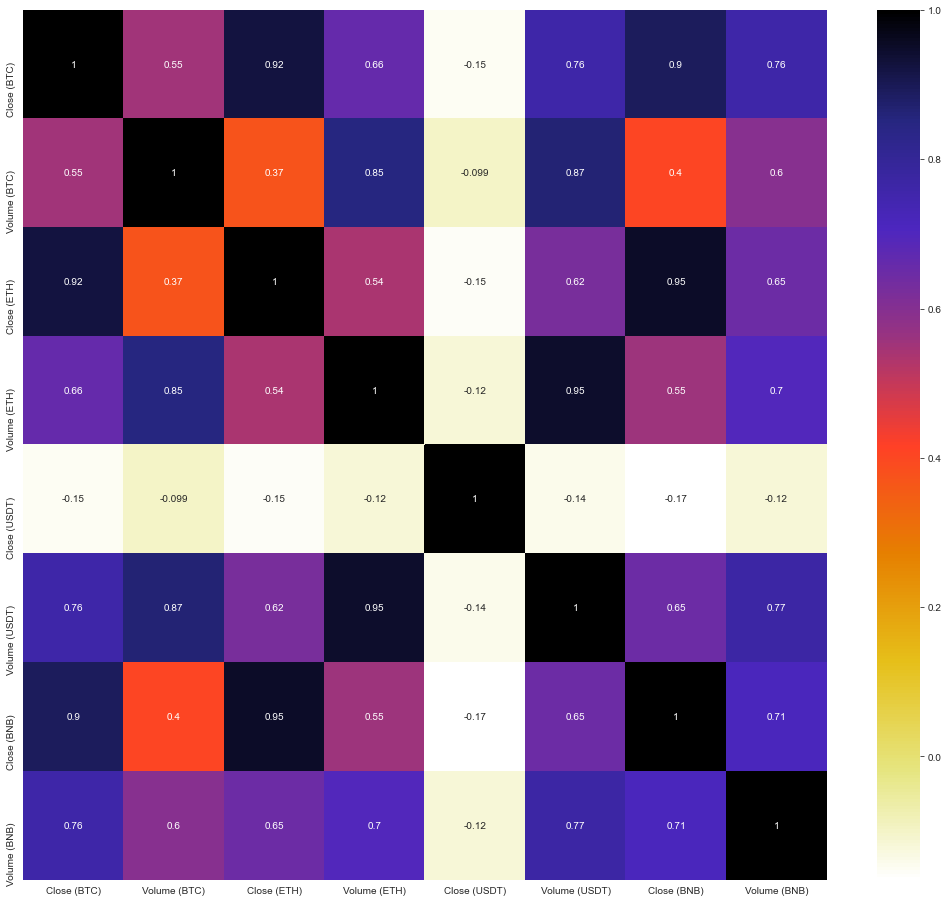

In [17]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

**Data Preprocessing**

In [18]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [20]:
fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [21]:
X_test

array([[4.28395721e+02, 3.61533986e+10, 2.36449146e+01, 2.28141192e+08],
       [2.79211719e+03, 4.31938642e+10, 3.85463806e+02, 1.39264761e+09],
       [2.32848007e+02, 3.30732000e+09, 1.00178003e+01, 2.69540000e+07],
       ...,
       [2.34215027e+02, 2.33236615e+10, 2.80118790e+01, 1.83750146e+08],
       [3.86466125e+02, 3.71265956e+10, 2.22773056e+01, 2.55812854e+08],
       [2.34489502e+03, 1.78501337e+11, 5.20416748e+02, 5.19539909e+09]])

**Feature selection**

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_test[0]

array([0.07398519, 0.12562186, 0.03159144, 0.0121894 ])

In [24]:
print(X_test.shape)
print(X_train.shape)

data.shape

(366, 4)
(1460, 4)


(1826, 8)

**BaseLine Modeling**

In [25]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [28]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

**Models Evaluation**

In [29]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [30]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9864447816225009
------------------------------
------------------------------
random forest:  0.9855443269535679
------------------------------
------------------------------
decision tree:  0.9644736633236569
------------------------------
------------------------------
gradient boosting:  0.9720137846824118
------------------------------


**Hyperparameters estimators**

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [33]:
rf_random.best_params_

{'n_estimators': 480,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

**Model Evaluation (performance analysis)**

In [34]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)


print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9857046677327947
------------------------------


**Prediction**

In [35]:
data.tail(1)

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2022-12-05 00:00:00+00:00,16974.826172,22209086834,1259.676758,6120359523,1.000054,28743587598,288.474274,705616866


**Model Serialization**

In [36]:
joblib.dump(value=rf, filename="models/forecasting_btc.joblib")

['models/forecasting_btc.joblib']

In [37]:
print(Y_test[0])
print(Y_pred_rf[0])

11711.505859375
12028.436840820312
